# Fast Fourier Transforms 
##### This is for VUI Concentration

An FFT, or Fast Fourier Transform, is an efficient implementation of a Discrete Fourier Transform. The algorithm transforms a sum of sinusoidal signals into into its pure frequency components. In the following quiz, we will demonstrate adding sinusoidal waves together and then deconstructing them back into their component frequencies.

* **choose_frequencies** choose three frequencies in a range from 1 to 50. These are the number of full cycles each sinusoidal wave will have in one "time unit". Running the definition will produce a visual of the three chosen frequencies as well as a new wave that is the sum of the three. This is similar to an acoustic signal, which is the sum of many sinusoidal waves. The waves may have different phases and amplitudes as well. Here's an example of a choice of (3, 8, 1) for the three frequencies.

* **add_the_waves** second definition is where the waves are created. For this demonstration, we will only create three. This has been done for you with the utils.make_waves function - take a look at to understand how it works. You just need to add them together. This simulates an audio signal, which is really just sinusoidal waves added together. In audio signals, the sinusoidal waves are created by sound vibrations and may be at varying amplitudes and phase as well as frequency. To simulate this variety, the utils.make_waves function provides random amplitudes and phase shifts.

* **demo_fft** An FFT can be created with a variety of library functions including scipy.fftpack.fft , which we'll use in this quiz. Read the linked reference to understand how to use it in code.

This FFT algorithm will create both positive and negative values, but we'll just display the positive ones. When you're done, you should see something like the following, showing peaks at the three frequency values originally provided!

In [26]:
import matplotlib.pyplot as plt
import numpy as np

def sinusoid(freq):
    """
    return a sinusoidal of random amplitude and phase for a given frequency
    :param freq: 
    :return: 
    """
    phase = np.random.random()
    amplitude = 2 * (np.random.random_integers(1, 10))
    return amplitude * np.cos(2 * np.pi * freq - phase)


def get_wave_timing(num_samples=500, range_of_time = 5.0):
    """
    provide an array of time values of size num_samples spread evenly over range_of_time
    :param num_samples: int 
    :param range_of_time: float
    :return: int, float, np.array
    """
    # sample spacing
    spacing = range_of_time / num_samples
    # array for time samples
    t = np.linspace(0.0, range_of_time, num_samples)
    return num_samples, spacing, t


def make_waves(t, freqs):
    """
    convert three frequencies into arrays of discrete values representing sinusoidal waves
    :param freqs: [float, float, float]
    :return: [np.array, np.array, np.array]
    """
    w0 = sinusoid(t * freqs[0])
    w1 = sinusoid(t * freqs[1])
    w2 = sinusoid(t * freqs[2])
    return w0, w1, w2


def display_sinusoids(time_array, f1, f2, f3, sum):
    # plot three frequencies with random phase shifts on y axis
    plt.figure()
    fig, ax = plt.subplots(4, 1)
    # plt.subplot(411)  # 3 rows, 1 column, fignum 1
    ax[0].plot(time_array, f1)
    ax[0].set_title('1st frequency component')

    # plt.subplot(412)  # 3 rows, 1 column, fignum 2
    ax[1].plot(time_array, f2)
    ax[1].set_title('2nd frequency component')

    # plt.subplot(413)  # 3 rows, 1 column, fignum 3
    ax[2].plot(time_array, f3)
    ax[2].set_title('3rd frequency component')

    # sum
    # plt.subplot(414)  # 3 rows, 1 column, fignum 4
    ax[3].plot(time_array, sum, 'r')
    ax[3].set_title('Sum of components')
    ax[3].set_ylabel('amplitude')
    ax[3].set_xlabel('time')

    # adjust format of display to make room for titles
    plt.subplots_adjust(
         top=0.94,
         bottom=0.11,
         left=0.11,
         right=0.97,
         hspace=0.65,
         wspace=0.2
    )
    plt.show()
    return fig


def display_fft(xf, yf):
    num_samples = np.shape(yf)[0]
    fig, ax = plt.subplots()
    ax.plot(xf, 2.0 / num_samples * np.abs(yf[:num_samples]))
    plt.title('Fast Fourier Transform')
    plt.xlabel('frequency')
    plt.ylabel('amplitude')
    return fig

In [27]:
import numpy as np
import scipy.fftpack
# import utils as utils
import random

def choose_frequencies():
    """
    # provide three frequencies in a range between 1 and 50    
    :return: [int, int, int]
    """
    
    freq1 = random.randint(1, 51)
    freq2 = random.randint(1, 51)
    freq3 = random.randint(1, 51)
   
    return [freq1, freq2, freq3]


def add_the_waves(freqs):
    """
    create three sinusoidal waves and one wave that is the sum of the three
    :param freqs: [int, int, int]
    :return: [np.array, np.array, np.array, np.array]
        representing wave1, wave2, wave3, sum of waves
        each array contains 500(by default) discrete values for plotting a sinusoidal
    """
    _, _, t = get_wave_timing()
    w1, w2, w3 = make_waves(t, freqs)

    sum_waves = w1+w2+w3

    return [w1, w2, w3, sum_waves]


def demo_fft(sum_waves):
    num_samples, spacing, _ = get_wave_timing()

    # Create a Fast Fourier Transform of the waveform using scipy.fftpack.fft named 'y_fft'
    y_fft = scipy.fftpack.fft(sum_waves)
    x_fft = np.linspace(0.0, 1.0/spacing, num_samples)
    
    return x_fft, y_fft

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: This function is deprecated. Please call randint(1, 10 + 1) instead
  # This is added back by InteractiveShellApp.init_path()


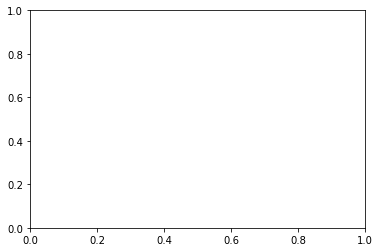

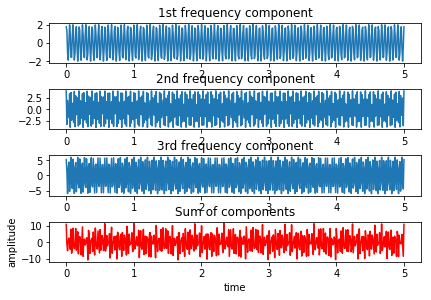

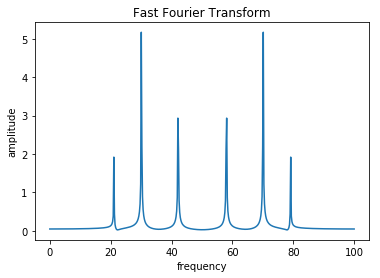

In [28]:
_, _, t = get_wave_timing()

waves_list = add_the_waves(choose_frequencies())
display_sinusoids(t, waves_list[0], waves_list[1], waves_list[2], waves_list[3])
x_fft, y_fft = demo_fft(waves_list[3])

display_fft(x_fft, y_fft)
